In [15]:
## import libraries

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as func
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import copy

In [7]:
## check for gpus and assign to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
### load images
imageSize = 512 if torch.cuda.is_available() else 128

## transform to tensor and resize image
loader = transforms.Compose([transforms.Resize(imageSize), transforms.ToTensor()])

## image loader function
def imageLoader(path):
  image = Image.open(path)
  image = loader(image).unsqueeze(0)
  return image.to(device, torch.float)

## load style and content images
contentImage = imageLoader('./images/dancing.jpg')
styleImage = imageLoader('./images/picasso.jpg')

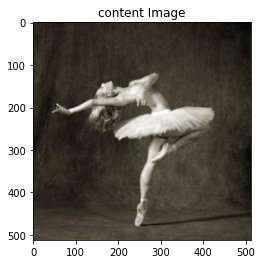

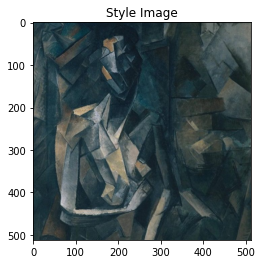

In [14]:
### display images

## transformer to PIL image
unloader = transforms.ToPILImage()

## function to display image
def imageShow(image, title = None):
  image = image.cpu().clone()
  image = image.squeeze(0)
  image = unloader(image)
  plt.imshow(image)
  if title is not None:
    plt.title(title)

plt.figure()
imageShow(contentImage, title = "content Image")

plt.figure()
imageShow(styleImage, title = "Style Image")


In [16]:
### define content loss - read more
class contentLoss(nn.Module):
  def __init__(self, target, ):
    super(contentLoss, self).__init__()

    self.target = target.detach()

  def forward(self, input):
    self.loss = func.mse_loss(input, self.target)
    return input


In [18]:
### style loss - read more and understand math

## define gram matrix
def gramMatrix(input):
  a, b, c, d = input.size()

  features = input.view(a*b, c*d)

  G = torch.mm(features, features.t())

  return G.div(a * b * c * d)

## define style loss
class styleLoss(nn.Module):
  def __init__(self, target_features):
    super(styleLoss, self).__init__()
    self.target = gramMatrix(target_features).detach()

  def forward(self, input):
    G = gramMatrix(input)
    self.loss = func.mse_loss(G, self.target)
    return input
